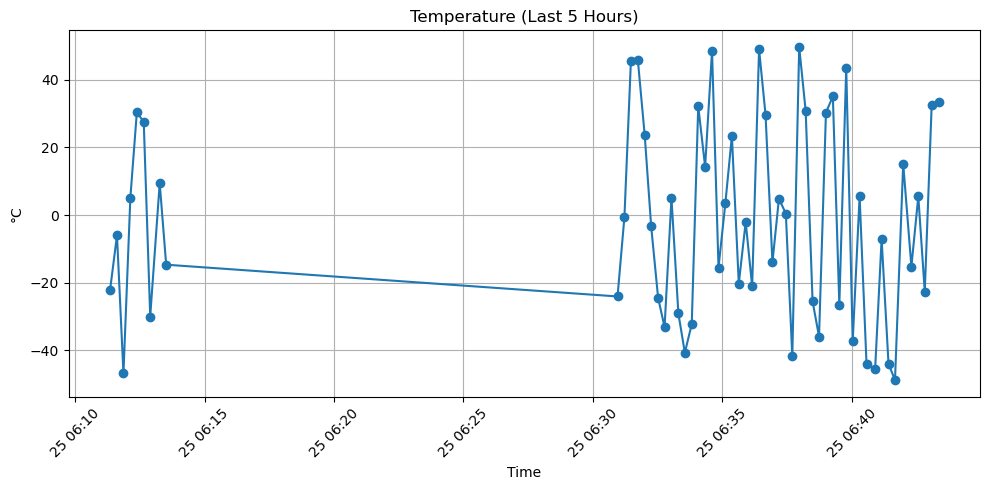

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

CHANNEL_ID = "2891036"
READ_API_KEY = "W2M51H97IM36XUQI"  # Omit if channel is public
FIELD = 1  # 1 for temperature, 2 for humidity, 3 for CO2

# Time range (last 5 hours = 300 minutes)
url = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/fields/{FIELD}.json"
params = {
    "api_key": READ_API_KEY,
    "minutes": 300,
    "results": 1000  # Limit the number of entries
}

response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
entries = data["feeds"]
df = pd.DataFrame(entries)
df["created_at"] = pd.to_datetime(df["created_at"])
df[f"field{FIELD}"] = pd.to_numeric(df[f"field{FIELD}"], errors='coerce')

# Plot
plt.figure(figsize=(10,5))
plt.plot(df["created_at"], df[f"field{FIELD}"], marker="o")
plt.title("Temperature (Last 5 Hours)")
plt.xlabel("Time")
plt.ylabel("°C")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


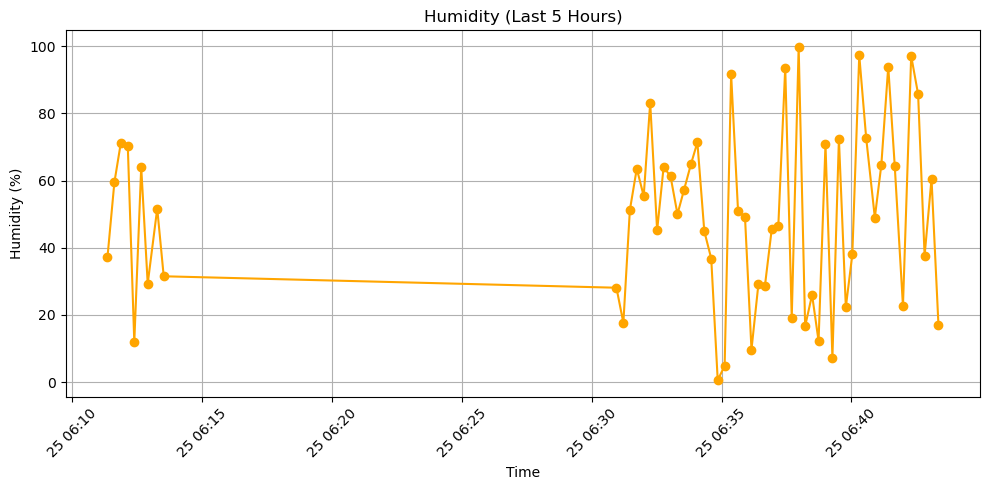

In [10]:
# HUMIDITY (Field 2)
FIELD = 2  # Humidity
params["field"] = FIELD
params["minutes"] = 300
params["results"] = 1000

# Update the request URL
url = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/fields/{FIELD}.json"
response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
entries = data["feeds"]
df = pd.DataFrame(entries)
df["created_at"] = pd.to_datetime(df["created_at"])
df[f"field{FIELD}"] = pd.to_numeric(df[f"field{FIELD}"], errors='coerce')

# Plot Humidity
plt.figure(figsize=(10,5))
plt.plot(df["created_at"], df[f"field{FIELD}"], color='orange', marker="o")
plt.title("Humidity (Last 5 Hours)")
plt.xlabel("Time")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


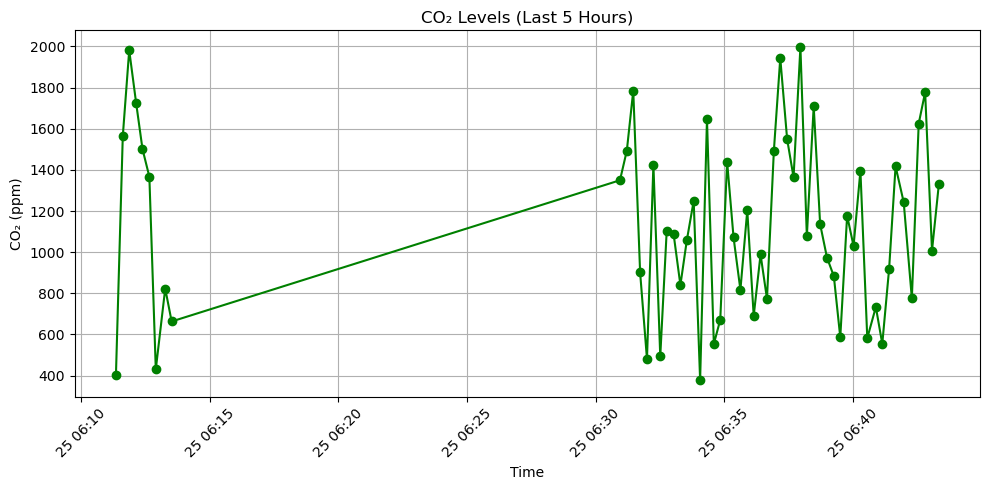

In [11]:
# CO₂ (Field 3)
FIELD = 3  # CO2
params["field"] = FIELD
params["minutes"] = 300
params["results"] = 1000

# Update the request URL
url = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/fields/{FIELD}.json"
response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
entries = data["feeds"]
df = pd.DataFrame(entries)
df["created_at"] = pd.to_datetime(df["created_at"])
df[f"field{FIELD}"] = pd.to_numeric(df[f"field{FIELD}"], errors='coerce')

# Plot CO₂
plt.figure(figsize=(10,5))
plt.plot(df["created_at"], df[f"field{FIELD}"], color='green', marker="o")
plt.title("CO₂ Levels (Last 5 Hours)")
plt.xlabel("Time")
plt.ylabel("CO₂ (ppm)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


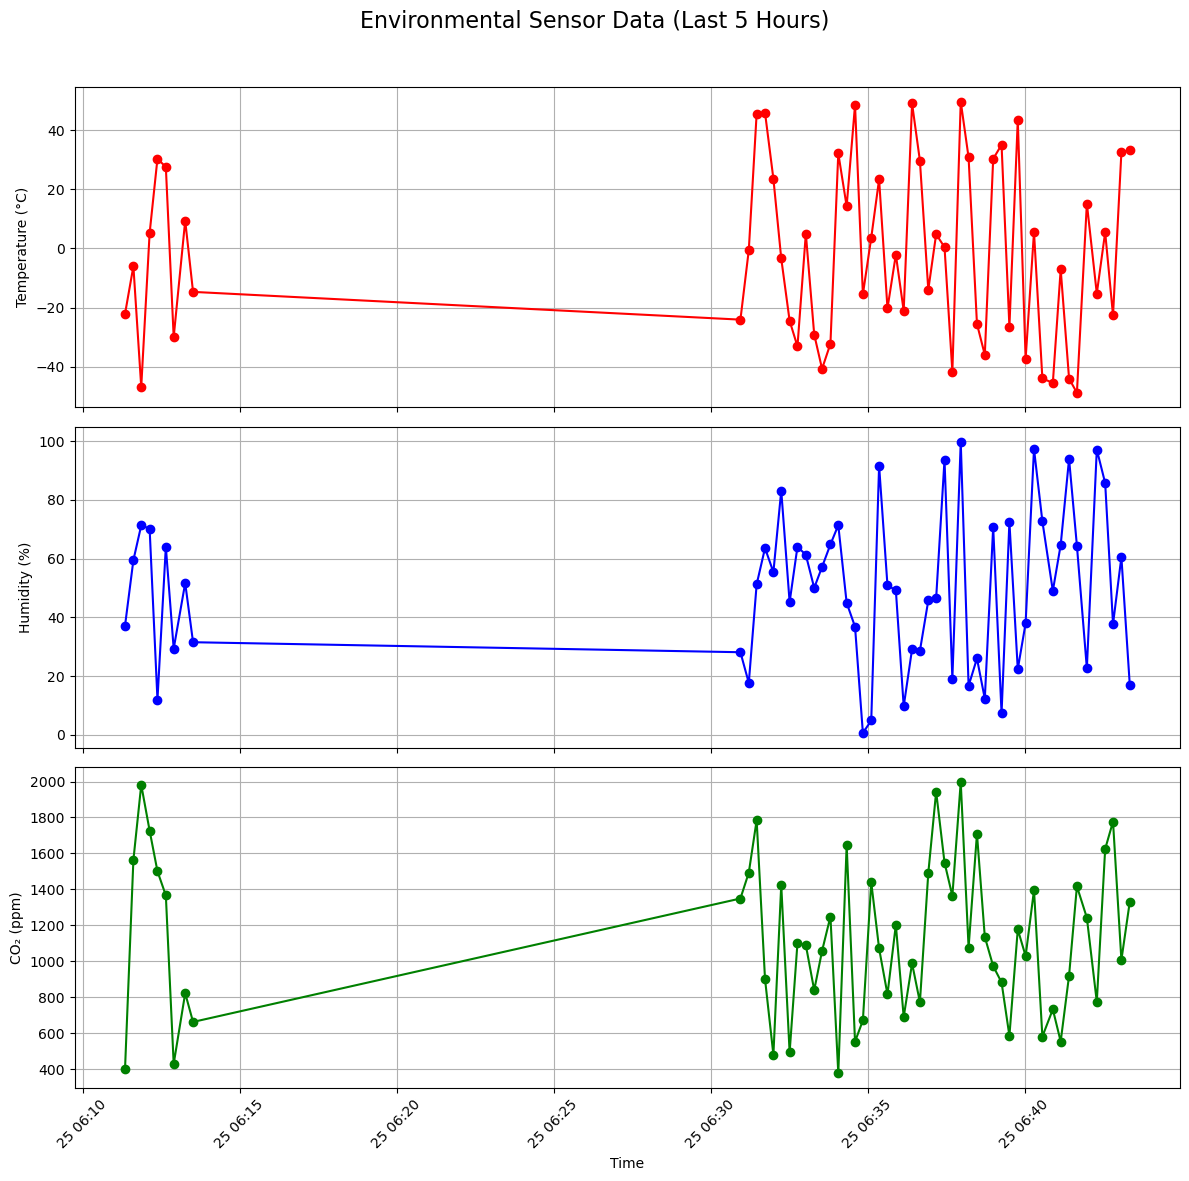

In [12]:

FIELDS = {
    1: {"label": "Temperature (°C)", "color": "red"},
    2: {"label": "Humidity (%)", "color": "blue"},
    3: {"label": "CO₂ (ppm)", "color": "green"}
}
params = {
    "api_key": READ_API_KEY,
    "minutes": 300,
    "results": 1000
}

# ---- Fetch and Plot ----
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
fig.suptitle("Environmental Sensor Data (Last 5 Hours)", fontsize=16)

for i, (field, meta) in enumerate(FIELDS.items()):
    url = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/fields/{field}.json"
    response = requests.get(url, params=params)
    data = response.json()

    entries = data["feeds"]
    df = pd.DataFrame(entries)
    df["created_at"] = pd.to_datetime(df["created_at"])
    df[f"field{field}"] = pd.to_numeric(df[f"field{field}"], errors='coerce')

    axs[i].plot(df["created_at"], df[f"field{field}"], color=meta["color"], marker='o', linestyle='-')
    axs[i].set_ylabel(meta["label"])
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

axs[2].set_xlabel("Time")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
